In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv("../datasets/MergedData.csv")
df

,Id,CourseNameShort,Academy,City,Languages,ProgrammeDuration,TuitionFees,ApplicationDeadline,IsCompleteOnlinePossible,BadgeLabel,SupportInternationalStudents,Subject,TypeOfElearning,From,To,Time,Frequency,Distance (km),city2,Jobs in City
0,8305,Computer Science,University Of Potsdam,potsdam,English,4 Semesters,NaN,<p>The Application Deadline Is 1 June.</p>,False,NaN,Welcome Event | Buddy Programme | Tutors | Acc...,Computer Science,NaN,potsdam,Berlin,22–26,2–3,26.14,potsdam,62.0
1,8305,Computer Science,University Of Potsdam,potsdam,English,4 Semesters,NaN,<p>The Application Deadline Is 1 June.</p>,False,NaN,Welcome Event | Buddy Programme | Tutors | Acc...,Computer Science,NaN,potsdam,Wildau,55–65,1,40.21,potsdam,62.0
2,8305,Computer Science,University Of Potsdam,potsdam,English,4 Semesters,NaN,<p>The Application Deadline Is 1 June.</p>,False,NaN,Welcome Event | Buddy Programme | Tutors | Acc...,Computer Science,NaN,potsdam,Bergholz-Rehbrücke,5–7,2,7.05,potsdam,62.0
3,4439,Computer Science,University Of Stuttgart,stuttgart,English,4 Semesters,Varied,<p>15 January For The Winter Semester Starting...,True,Partly Online,Welcome Event | Buddy Programme | Tutors | Acc...,Computer Science,"1,5,9,10,11,13",stuttgart,Tübingen,43–55,3,30.18,stuttgart,723.0
4,4439,Computer Science,University Of Stuttgart,stuttgart,English,4 Semesters,Varied,<p>15 January For The Winter Semester Starting...,True,Partly Online,Welcome Event | Buddy Programme | Tutors | Acc...,Computer Science,"1,5,9,10,11,13",stuttgart,Heilbronn,34–42,2,40.56,stuttgart,723.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,9595,Information Engineering,Technical University Of Munich,heilbronn,English,4 Semesters,NaN,<ul>\n\t<li>1 February To 31 May (winter Semes...,False,NaN,Null,Computer Science,NaN,heilbronn,Pforzheim,75–90,1,46.95,heilbronn,171.0
638,9595,Information Engineering,Technical University Of Munich,heilbronn,English,4 Semesters,NaN,<ul>\n\t<li>1 February To 31 May (winter Semes...,False,NaN,Null,Computer Science,NaN,heilbronn,Esslingen am Neckar,50–60,1,44.90,heilbronn,171.0
639,3724,Forest Information Technology (FIT),Eberswalde University For Sustainable Development,eberswalde,English,4 Semesters,NaN,<p>Non-EU And EU Applicants: 1 May For The Fol...,True,Partly Online,Welcome Event | Buddy Programme,Computer Science,"1,9,11,3,4,10",eberswalde,Berlin,34,1,45.12,eberswalde,0.0
640,3724,Forest Information Technology (FIT),Eberswalde University For Sustainable Development,eberswalde,English,4 Semesters,NaN,<p>Non-EU And EU Applicants: 1 May For The Fol...,True,Partly Online,Welcome Event | Buddy Programme,Computer Science,"1,9,11,3,4,10",eberswalde,Wildau¹,90–100,1,58.24,eberswalde,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            642 non-null    int64  
 1   CourseNameShort               642 non-null    object 
 2   Academy                       642 non-null    object 
 3   City                          642 non-null    object 
 4   Languages                     642 non-null    object 
 5   ProgrammeDuration             642 non-null    object 
 6   TuitionFees                   220 non-null    object 
 7   ApplicationDeadline           642 non-null    object 
 8   IsCompleteOnlinePossible      642 non-null    bool   
 9   BadgeLabel                    98 non-null     object 
 10  SupportInternationalStudents  642 non-null    object 
 11  Subject                       642 non-null    object 
 12  TypeOfElearning               113 non-null    object 
 13  From 

In [4]:
new_df = df[['Id','CourseNameShort','Academy','City','Languages','ProgrammeDuration','TuitionFees','To','Time','Frequency','Distance (km)','Jobs in City']]

KeyError: "['Time', 'Frequency'] not in index"

In [5]:
print(df.columns.tolist())

['Id', 'CourseNameShort', 'Academy', 'City', 'Languages', 'ProgrammeDuration', 'TuitionFees', 'ApplicationDeadline', 'IsCompleteOnlinePossible', 'BadgeLabel', 'SupportInternationalStudents', 'Subject', 'TypeOfElearning', 'From', 'To', 'Time ', 'Frequency ', 'Distance (km)', 'city2', 'Jobs in City']


In [6]:
df.columns = df.columns.str.strip()

In [7]:
new_df = df[['Id','CourseNameShort','Academy','City','Languages','ProgrammeDuration','TuitionFees','To','Time','Frequency','Distance (km)','Jobs in City']]

In [8]:
new_df

,Id,CourseNameShort,Academy,City,Languages,ProgrammeDuration,TuitionFees,To,Time,Frequency,Distance (km),Jobs in City
0,8305,Computer Science,University Of Potsdam,potsdam,English,4 Semesters,NaN,Berlin,22–26,2–3,26.14,62.0
1,8305,Computer Science,University Of Potsdam,potsdam,English,4 Semesters,NaN,Wildau,55–65,1,40.21,62.0
2,8305,Computer Science,University Of Potsdam,potsdam,English,4 Semesters,NaN,Bergholz-Rehbrücke,5–7,2,7.05,62.0
3,4439,Computer Science,University Of Stuttgart,stuttgart,English,4 Semesters,Varied,Tübingen,43–55,3,30.18,723.0
4,4439,Computer Science,University Of Stuttgart,stuttgart,English,4 Semesters,Varied,Heilbronn,34–42,2,40.56,723.0
...,...,...,...,...,...,...,...,...,...,...,...,...
637,9595,Information Engineering,Technical University Of Munich,heilbronn,English,4 Semesters,NaN,Pforzheim,75–90,1,46.95,171.0
638,9595,Information Engineering,Technical University Of Munich,heilbronn,English,4 Semesters,NaN,Esslingen am Neckar,50–60,1,44.90,171.0
639,3724,Forest Information Technology (FIT),Eberswalde University For Sustainable Development,eberswalde,English,4 Semesters,NaN,Berlin,34,1,45.12,0.0
640,3724,Forest Information Technology (FIT),Eberswalde University For Sustainable Development,eberswalde,English,4 Semesters,NaN,Wildau¹,90–100,1,58.24,0.0


# Remove "Semesters" and convert to numeric


In [9]:
new_df['ProgrammeDuration'] = new_df['ProgrammeDuration'].str.replace(" Semesters", "").astype(int)

ValueError: invalid literal for int() with base 10: '3, 4'

In [10]:
import re

# Define a function to process ProgrammeDuration
def process_duration(duration):
    # Extract all numerical values from the text
    semesters = [int(num) for num in re.findall(r'\d+', duration)]
    # Return the average of semesters
    return sum(semesters) / len(semesters) if semesters else None

# Apply the function to the column
new_df['ProgrammeDuration'] = new_df['ProgrammeDuration'].apply(process_duration)

# Convert the result to integer (optional, if you don't need decimals)
new_df['ProgrammeDuration'] = new_df['ProgrammeDuration'].astype(int)

print(new_df['ProgrammeDuration'])


0      4
1      4
2      4
3      4
4      4
      ..
637    4
638    4
639    4
640    4
641    4
Name: ProgrammeDuration, Length: 642, dtype: int64


C:\Users\gaura\AppData\Local\Temp\ipykernel_5696\2224929605.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['ProgrammeDuration'] = new_df['ProgrammeDuration'].apply(process_duration)
C:\Users\gaura\AppData\Local\Temp\ipykernel_5696\2224929605.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['ProgrammeDuration'] = new_df['ProgrammeDuration'].astype(int)


# Handle Missing and 'Varied' values in TuitionFees

In [11]:
# Replace NaN with 0
new_df['TuitionFees'] = new_df['TuitionFees'].fillna(0)

# Replace "Varied" with a placeholder (e.g., 0 or a mean value)
new_df['TuitionFees'] = new_df['TuitionFees'].replace('Varied', np.nan).astype(float)


C:\Users\gaura\AppData\Local\Temp\ipykernel_5696\1320101112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['TuitionFees'] = new_df['TuitionFees'].fillna(0)


ValueError: could not convert string to float: '6,450'

In [12]:
# Replace commas with an empty string to handle numbers with commas
new_df['TuitionFees'] = new_df['TuitionFees'].astype(str).str.replace(',', '')

# Replace NaN with 0
new_df['TuitionFees'] = new_df['TuitionFees'].fillna(0)

# Replace "Varied" with 0 (or another placeholder) and convert to float
new_df['TuitionFees'] = new_df['TuitionFees'].replace('Varied', np.nan)


C:\Users\gaura\AppData\Local\Temp\ipykernel_5696\2839662799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['TuitionFees'] = new_df['TuitionFees'].astype(str).str.replace(',', '')
C:\Users\gaura\AppData\Local\Temp\ipykernel_5696\2839662799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['TuitionFees'] = new_df['TuitionFees'].fillna(0)
C:\Users\gaura\AppData\Local\Temp\ipykernel_5696\2839662799.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 642 non-null    int64  
 1   CourseNameShort    642 non-null    object 
 2   Academy            642 non-null    object 
 3   City               642 non-null    object 
 4   Languages          642 non-null    object 
 5   ProgrammeDuration  642 non-null    int64  
 6   TuitionFees        559 non-null    object 
 7   To                 642 non-null    object 
 8   Time               642 non-null    object 
 9   Frequency          642 non-null    object 
 10  Distance (km)      642 non-null    float64
 11  Jobs in City       632 non-null    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 60.3+ KB


In [14]:
# Example: Analyze rows where TuitionFees is missing
missing_tuition_fees = new_df[new_df['TuitionFees'].isnull()]
print(missing_tuition_fees)

# Group by Academy to see patterns
grouped_analysis = new_df.groupby('Academy')['TuitionFees'].apply(lambda x: x.isnull().sum())
print(grouped_analysis)

total_missing = grouped_analysis[grouped_analysis > 0].sum()
print(f"Total missing TuitionFees count: {total_missing} thus {642 - total_missing} can see in info")


       Id   CourseNameShort                  Academy       City Languages  \
3    4439  Computer Science  University Of Stuttgart  stuttgart   English   
4    4439  Computer Science  University Of Stuttgart  stuttgart   English   
5    4439  Computer Science  University Of Stuttgart  stuttgart   English   
6    4439  Computer Science  University Of Stuttgart  stuttgart   English   
7    4439  Computer Science  University Of Stuttgart  stuttgart   English   
..    ...               ...                      ...        ...       ...   
612  5634  Machine Learning   University Of Tübingen   tübingen   English   
613  5634  Machine Learning   University Of Tübingen   tübingen   English   
614  5634  Machine Learning   University Of Tübingen   tübingen   English   
615  5634  Machine Learning   University Of Tübingen   tübingen   English   
616  5634  Machine Learning   University Of Tübingen   tübingen   English   

     ProgrammeDuration TuitionFees                        To    Time  \
3  

# University with some fees 


In [15]:

# Filter the grouped analysis to get only rows with missing counts greater than 0
print(grouped_analysis[grouped_analysis > 0])

Academy
Frankfurt School Of Finance & Management                             12
Heilbronn University Of Applied Sciences                              5
Hochschule Für Technik Stuttgart - University Of Applied Sciences     7
Offenburg University Of Applied Sciences                              4
Ruhr-Universität Bochum                                              16
Ulm University                                                        6
Ulm University Of Applied Sciences                                    6
University Of Freiburg                                                4
University Of Konstanz                                                2
University Of Stuttgart                                              14
University Of Tübingen                                                7
Name: TuitionFees, dtype: int64


In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 642 non-null    int64  
 1   CourseNameShort    642 non-null    object 
 2   Academy            642 non-null    object 
 3   City               642 non-null    object 
 4   Languages          642 non-null    object 
 5   ProgrammeDuration  642 non-null    int64  
 6   TuitionFees        559 non-null    object 
 7   To                 642 non-null    object 
 8   Time               642 non-null    object 
 9   Frequency          642 non-null    object 
 10  Distance (km)      642 non-null    float64
 11  Jobs in City       632 non-null    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 60.3+ KB


# Convert Time to Numberic 

In [17]:
# Split the range, calculate the average, and assign it back
new_df['Time'] = new_df['Time'].str.split('–').apply(lambda x: (int(x[0]) + int(x[1])) / 2)

ValueError: invalid literal for int() with base 10: 'Approximately 90'

In [18]:
new_df['Time']

0       22–26
1       55–65
2         5–7
3       43–55
4       34–42
        ...  
637     75–90
638     50–60
639        34
640    90–100
641     22–26
Name: Time, Length: 642, dtype: object

In [19]:
import re

def process_time(value):
    # Remove any text in parentheses or extra spaces
    value = re.sub(r'\(.*?\)', '', value).strip()

    # Extract all numbers (handles ranges and approximate values)
    nums = [int(num) for num in re.findall(r'\d+', value)]
    
    # Return the mean if multiple numbers are found, otherwise the single number
    return sum(nums) / len(nums) if nums else None

# Apply the function to the Time column
new_df['Time'] = new_df['Time'].astype(str).apply(process_time)

# Display the processed Time column
print(new_df['Time'])


0      24.0
1      60.0
2       6.0
3      49.0
4      38.0
       ... 
637    82.5
638    55.0
639    34.0
640    95.0
641    24.0
Name: Time, Length: 642, dtype: float64


C:\Users\gaura\AppData\Local\Temp\ipykernel_5696\3398126405.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Time'] = new_df['Time'].astype(str).apply(process_time)


In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 642 non-null    int64  
 1   CourseNameShort    642 non-null    object 
 2   Academy            642 non-null    object 
 3   City               642 non-null    object 
 4   Languages          642 non-null    object 
 5   ProgrammeDuration  642 non-null    int64  
 6   TuitionFees        559 non-null    object 
 7   To                 642 non-null    object 
 8   Time               642 non-null    float64
 9   Frequency          642 non-null    object 
 10  Distance (km)      642 non-null    float64
 11  Jobs in City       632 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 60.3+ KB


In [25]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')


In [22]:

# Set pandas options to display all rows
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns (optional)
pd.set_option('display.width', None)  # Adjust width for better visualization

# Frequency 

In [23]:
new_df['Frequency']

0                        2–3
1                          1
2                          2
3                          3
4                          2
5                          2
6                          2
7                          2
8                          4
9                          1
10                         1
11                       0.5
12                       0.5
13                         1
14                         1
15                         1
16                         1
17                         1
18                         1
19                         1
20                         1
21                         1
22                         1
23                         1
24                         1
25                         4
26                         1
27                         1
28                         2
29                         2
30                         1
31                         2
32                         4
33                         2
34            

In [24]:
import re

def process_frequency(value):
    # Handle 'direct trains daily' case
    if 'direct trains daily' in value.lower():
        return 0.5
    
    # Extract numbers from the value
    nums = [float(num) for num in re.findall(r'\d+', value)]
    
    # Return the mean if multiple numbers are found, otherwise the single number
    return sum(nums) / len(nums) if nums else None

# Apply the function to the Frequency column
new_df['Frequency'] = new_df['Frequency'].astype(str).apply(process_frequency)

# Display the processed Frequency column
print(new_df['Frequency'])


0       2.5
1       1.0
2       2.0
3       3.0
4       2.0
5       2.0
6       2.0
7       2.0
8       4.0
9       1.0
10      1.0
11      2.5
12      2.5
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      4.0
26      1.0
27      1.0
28      2.0
29      2.0
30      1.0
31      2.0
32      4.0
33      2.0
34      1.0
35      1.0
36      1.0
37      1.0
38      1.0
39      1.0
40      1.0
41      1.0
42      1.0
43      1.0
44      1.0
45      1.0
46      0.5
47      1.0
48      1.0
49      1.0
50      1.0
51      1.0
52      1.0
53      1.0
54      2.5
55      2.5
56      1.0
57      2.0
58      4.0
59      1.0
60      2.5
61      1.0
62      1.0
63      1.0
64      1.0
65      2.0
66      2.5
67      1.0
68      2.0
69      2.0
70      1.0
71      1.0
72      1.0
73      1.0
74      1.0
75      1.0
76      1.0
77      1.0
78      1.0
79      1.0
80      1.0
81      2.5
82      1.0
83  

C:\Users\gaura\AppData\Local\Temp\ipykernel_5696\2236284695.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Frequency'] = new_df['Frequency'].astype(str).apply(process_frequency)


In [25]:
new_df['Frequency']

0       2.5
1       1.0
2       2.0
3       3.0
4       2.0
5       2.0
6       2.0
7       2.0
8       4.0
9       1.0
10      1.0
11      2.5
12      2.5
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      4.0
26      1.0
27      1.0
28      2.0
29      2.0
30      1.0
31      2.0
32      4.0
33      2.0
34      1.0
35      1.0
36      1.0
37      1.0
38      1.0
39      1.0
40      1.0
41      1.0
42      1.0
43      1.0
44      1.0
45      1.0
46      0.5
47      1.0
48      1.0
49      1.0
50      1.0
51      1.0
52      1.0
53      1.0
54      2.5
55      2.5
56      1.0
57      2.0
58      4.0
59      1.0
60      2.5
61      1.0
62      1.0
63      1.0
64      1.0
65      2.0
66      2.5
67      1.0
68      2.0
69      2.0
70      1.0
71      1.0
72      1.0
73      1.0
74      1.0
75      1.0
76      1.0
77      1.0
78      1.0
79      1.0
80      1.0
81      2.5
82      1.0
83  

In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 642 non-null    int64  
 1   CourseNameShort    642 non-null    object 
 2   Academy            642 non-null    object 
 3   City               642 non-null    object 
 4   Languages          642 non-null    object 
 5   ProgrammeDuration  642 non-null    int64  
 6   TuitionFees        559 non-null    object 
 7   To                 642 non-null    object 
 8   Time               642 non-null    float64
 9   Frequency          642 non-null    float64
 10  Distance (km)      642 non-null    float64
 11  Jobs in City       632 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 60.3+ KB


In [27]:

print(new_df[new_df['Jobs in City'].isnull()])


       Id                                    CourseNameShort  \
219  3696                       Software Systems Engineering   
220  3696                       Software Systems Engineering   
230  7636                                       Data Science   
231  7636                                       Data Science   
326  4874      MSc Data Analytics And Decision Science (DDS)   
327  4874      MSc Data Analytics And Decision Science (DDS)   
362  9198  MSc In Applied Health Informatics & Digital Me...   
363  9198  MSc In Applied Health Informatics & Digital Me...   
441  9228                                Information Systems   
442  9228                                Information Systems   

                                      Academy    City       Languages  \
219                    RWTH Aachen University  aachen         English   
220                    RWTH Aachen University  aachen         English   
230                    RWTH Aachen University  aachen         English   
231

In [28]:

# Group by Academy to see patterns
grouped_analysis = new_df.groupby('City')['Jobs in City'].apply(lambda x: x.isnull().sum())
print(grouped_analysis)

City
aachen                       10
aalen                         0
amberg                        0
augsburg                      0
bamberg                       0
bayreuth                      0
berlin                        0
bielefeld                     0
bingen am rhein               0
bochum                        0
bonn                          0
braunschweig                  0
bremen                        0
cham                          0
chemnitz                      0
darmstadt                     0
deggendorf                    0
dortmund                      0
dresden                       0
düsseldorf                    0
eberswalde                    0
emden                         0
erlangen                      0
frankfurt am main             0
freiburg im breisgau          0
fulda                         0
furtwangen im schwarzwald     0
gummersbach                   0
göttingen                     0
gütersloh                     0
hamburg                       0
han

In [29]:
# Fill missing values in the 'Jobs in City' column with 177
new_df['Jobs in City'] = new_df['Jobs in City'].fillna(177)

# Verify the updated DataFrame
print(new_df[new_df['Jobs in City'] == 177])


       Id                                    CourseNameShort  \
219  3696                       Software Systems Engineering   
220  3696                       Software Systems Engineering   
230  7636                                       Data Science   
231  7636                                       Data Science   
326  4874      MSc Data Analytics And Decision Science (DDS)   
327  4874      MSc Data Analytics And Decision Science (DDS)   
362  9198  MSc In Applied Health Informatics & Digital Me...   
363  9198  MSc In Applied Health Informatics & Digital Me...   
441  9228                                Information Systems   
442  9228                                Information Systems   

                                      Academy    City       Languages  \
219                    RWTH Aachen University  aachen         English   
220                    RWTH Aachen University  aachen         English   
230                    RWTH Aachen University  aachen         English   
231

C:\Users\gaura\AppData\Local\Temp\ipykernel_5696\1549379774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Jobs in City'] = new_df['Jobs in City'].fillna(177)


In [38]:
new_df 

,Id,CourseNameShort,Academy,City,Languages,ProgrammeDuration,TuitionFees,To,Time,Frequency,Distance (km),Jobs in City
0,8305,Computer Science,University Of Potsdam,potsdam,English,4,0,Berlin,24.0,2.5,26.14,62.0
1,8305,Computer Science,University Of Potsdam,potsdam,English,4,0,Wildau,60.0,1.0,40.21,62.0
2,8305,Computer Science,University Of Potsdam,potsdam,English,4,0,Bergholz-Rehbrücke,6.0,2.0,7.05,62.0
3,4439,Computer Science,University Of Stuttgart,stuttgart,English,4,NaN,Tübingen,49.0,3.0,30.18,723.0
4,4439,Computer Science,University Of Stuttgart,stuttgart,English,4,NaN,Heilbronn,38.0,2.0,40.56,723.0
5,4439,Computer Science,University Of Stuttgart,stuttgart,English,4,NaN,Nürtingen,27.5,2.0,20.44,723.0
6,4439,Computer Science,University Of Stuttgart,stuttgart,English,4,NaN,Reutlingen,45.0,2.0,31.94,723.0
7,4439,Computer Science,University Of Stuttgart,stuttgart,English,4,NaN,Pforzheim,40.0,2.0,37.19,723.0
8,4439,Computer Science,University Of Stuttgart,stuttgart,English,4,NaN,Esslingen am Neckar,12.5,4.0,10.16,723.0
9,4439,Computer Science,University Of Stuttgart,stuttgart,English,4,NaN,Geislingen an der Steige,50.0,1.0,51.42,723.0


In [44]:
jobs = pd.read_csv("../datasets/UniForMe_Jobs.xls")
jobs = jobs[['city','no of jobs']]
jobs

,city,no of jobs
0,potsdam,62.0
1,kiel,111.0
2,stuttgart,723.0
3,deggendorf,25.0
4,paderborn,92.0
5,passau,7.0
6,Siegen,89.0
7,Bonn,143.0
8,Bingen am Rhein,6.0
9,Regensburg,106.0


In [45]:
# Convert both 'To' and 'city' columns to lowercase to ensure case-insensitive matching
new_df['To'] = new_df['To'].str.lower()
jobs['city'] = jobs['city'].str.lower()

# Merge the datasets on the 'To' (from new_df) and 'city' (from jobs) columns
merged_df = new_df.merge(jobs, left_on='To', right_on='city', how='left')

# Rename the 'no of jobs' column to 'Jobs in neighbour cities' in the merged DataFrame
merged_df.rename(columns={'no of jobs': 'Jobs in neighbour cities'}, inplace=True)

# Display the resulting DataFrame
print(merged_df)


       Id                                    CourseNameShort  \
0    8305                                   Computer Science   
1    8305                                   Computer Science   
2    8305                                   Computer Science   
3    4439                                   Computer Science   
4    4439                                   Computer Science   
5    4439                                   Computer Science   
6    4439                                   Computer Science   
7    4439                                   Computer Science   
8    4439                                   Computer Science   
9    4439                                   Computer Science   
10   4870                       MSc Applied Computer Science   
11   4870                       MSc Applied Computer Science   
12   4870                       MSc Applied Computer Science   
13   5616              Master Of Science In Computer Science   
14   5616              Master Of Science

C:\Users\gaura\AppData\Local\Temp\ipykernel_5696\2135906964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['To'] = new_df['To'].str.lower()


In [52]:
merged_df.head()


,Id,CourseNameShort,Academy,City,Languages,ProgrammeDuration,TuitionFees,To,Time,Frequency,Distance (km),Jobs in City,CityCluster,Jobs in neighbour cities
0,8305,Computer Science,University Of Potsdam,potsdam,English,4,0,berlin,24.0,2.5,26.14,62.0,2,1062.0
1,8305,Computer Science,University Of Potsdam,potsdam,English,4,0,wildau,60.0,1.0,40.21,62.0,2,1.0
2,8305,Computer Science,University Of Potsdam,potsdam,English,4,0,bergholz-rehbrücke,6.0,2.0,7.05,62.0,2,0.0
3,4439,Computer Science,University Of Stuttgart,stuttgart,English,4,NaN,tübingen,49.0,3.0,30.18,723.0,1,56.0
4,4439,Computer Science,University Of Stuttgart,stuttgart,English,4,NaN,heilbronn,38.0,2.0,40.56,723.0,1,171.0


In [47]:
# Drop the 'city' column
merged_df = merged_df.drop(columns=['city'])

In [48]:
merged_df 

,Id,CourseNameShort,Academy,City,Languages,ProgrammeDuration,TuitionFees,To,Time,Frequency,Distance (km),Jobs in City,CityCluster,Jobs in neighbour cities
0,8305,Computer Science,University Of Potsdam,potsdam,English,4,0,berlin,24.0,2.5,26.14,62.0,2,1062.0
1,8305,Computer Science,University Of Potsdam,potsdam,English,4,0,wildau,60.0,1.0,40.21,62.0,2,1.0
2,8305,Computer Science,University Of Potsdam,potsdam,English,4,0,bergholz-rehbrücke,6.0,2.0,7.05,62.0,2,0.0
3,4439,Computer Science,University Of Stuttgart,stuttgart,English,4,NaN,tübingen,49.0,3.0,30.18,723.0,1,56.0
4,4439,Computer Science,University Of Stuttgart,stuttgart,English,4,NaN,heilbronn,38.0,2.0,40.56,723.0,1,171.0
5,4439,Computer Science,University Of Stuttgart,stuttgart,English,4,NaN,nürtingen,27.5,2.0,20.44,723.0,1,61.0
6,4439,Computer Science,University Of Stuttgart,stuttgart,English,4,NaN,reutlingen,45.0,2.0,31.94,723.0,1,69.0
7,4439,Computer Science,University Of Stuttgart,stuttgart,English,4,NaN,pforzheim,40.0,2.0,37.19,723.0,1,20.0
8,4439,Computer Science,University Of Stuttgart,stuttgart,English,4,NaN,esslingen am neckar,12.5,4.0,10.16,723.0,1,7.0
9,4439,Computer Science,University Of Stuttgart,stuttgart,English,4,NaN,geislingen an der steige,50.0,1.0,51.42,723.0,1,2.0


In [49]:

final_df = merged_df[['Id','CourseNameShort','Academy','City','Jobs in City','Languages','ProgrammeDuration','TuitionFees','To','Time','Frequency','Distance (km)','Jobs in neighbour cities']]

In [53]:
final_df.head()

,Id,CourseNameShort,Academy,City,Jobs in City,Languages,ProgrammeDuration,TuitionFees,To,Time,Frequency,Distance (km),Jobs in neighbour cities
0,8305,Computer Science,University Of Potsdam,potsdam,62.0,English,4,0,berlin,24.0,2.5,26.14,1062.0
1,8305,Computer Science,University Of Potsdam,potsdam,62.0,English,4,0,wildau,60.0,1.0,40.21,1.0
2,8305,Computer Science,University Of Potsdam,potsdam,62.0,English,4,0,bergholz-rehbrücke,6.0,2.0,7.05,0.0
3,4439,Computer Science,University Of Stuttgart,stuttgart,723.0,English,4,NaN,tübingen,49.0,3.0,30.18,56.0
4,4439,Computer Science,University Of Stuttgart,stuttgart,723.0,English,4,NaN,heilbronn,38.0,2.0,40.56,171.0


In [51]:
# Save to a specific path
final_df.to_csv('../datasets/FinalDF.csv', index=False)

print("CSV file saved to the specified location.")

CSV file saved to the specified location.


In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        642 non-null    int64  
 1   CourseNameShort           642 non-null    object 
 2   Academy                   642 non-null    object 
 3   City                      642 non-null    object 
 4   Jobs in City              642 non-null    float64
 5   Languages                 642 non-null    object 
 6   ProgrammeDuration         642 non-null    int64  
 7   TuitionFees               559 non-null    object 
 8   To                        642 non-null    object 
 9   Time                      642 non-null    float64
 10  Frequency                 642 non-null    float64
 11  Distance (km)             642 non-null    float64
 12  Jobs in neighbour cities  631 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 65.3+ KB


In [59]:
# Group by Academy to see patterns
grouped_analysis = final_df.groupby('To')['Jobs in neighbour cities'].apply(lambda x: x.isnull().sum())
print(grouped_analysis)

To
aalen                        0
amberg                       0
ansbach                      0
aschaffenburg                0
augsburg                     0
bad homburg vor der höhe     0
bamberg                      0
bayreuth                     0
bergholz-rehbrücke           0
berlin                       0
bernburg (saale)             3
bielefeld                    0
bingen am rhein              0
birkenfeld                   0
bochum                       0
bonn                         0
braunschweig                 0
bremen                       0
bremerhaven                  0
burghausen¹                  1
cham                         0
chemnitz                     0
coburg                       0
darmstadt                    0
deggendorf                   0
dessau-roßlau                0
detmold                      0
dieburg                      0
dortmund                     0
duisburg                     0
düsseldorf                   0
eberswalde                   0
eichs

# EDA

## 1. Basic Info 

In [30]:
new_df.head()

,Id,CourseNameShort,Academy,City,Languages,ProgrammeDuration,TuitionFees,To,Time,Frequency,Distance (km),Jobs in City
0,8305,Computer Science,University Of Potsdam,potsdam,English,4,0,Berlin,24.0,2.5,26.14,62.0
1,8305,Computer Science,University Of Potsdam,potsdam,English,4,0,Wildau,60.0,1.0,40.21,62.0
2,8305,Computer Science,University Of Potsdam,potsdam,English,4,0,Bergholz-Rehbrücke,6.0,2.0,7.05,62.0
3,4439,Computer Science,University Of Stuttgart,stuttgart,English,4,NaN,Tübingen,49.0,3.0,30.18,723.0
4,4439,Computer Science,University Of Stuttgart,stuttgart,English,4,NaN,Heilbronn,38.0,2.0,40.56,723.0


In [31]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 642 non-null    int64  
 1   CourseNameShort    642 non-null    object 
 2   Academy            642 non-null    object 
 3   City               642 non-null    object 
 4   Languages          642 non-null    object 
 5   ProgrammeDuration  642 non-null    int64  
 6   TuitionFees        559 non-null    object 
 7   To                 642 non-null    object 
 8   Time               642 non-null    float64
 9   Frequency          642 non-null    float64
 10  Distance (km)      642 non-null    float64
 11  Jobs in City       642 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 60.3+ KB


In [32]:
new_df.describe()

,Id,ProgrammeDuration,Time,Frequency,Distance (km),Jobs in City
count,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
mean,6208.825545,3.831776,57.181464,1.720405,40.649657,177.791277
std,2188.964377,0.529669,32.294571,1.213588,13.635215,250.149441
min,3614.000000,3.000000,3.500000,0.500000,0.770000,0.000000
25%,4258.000000,4.000000,35.000000,1.000000,30.180000,24.000000
50%,5453.000000,4.000000,52.500000,1.000000,43.040000,82.000000
75%,8353.000000,4.000000,67.500000,2.000000,51.955000,189.000000
max,9863.000000,6.000000,185.000000,11.000000,59.950000,1062.000000


## 2. Missing Values 

In [17]:
!pip install seaborn 

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------- ------------------------------- 1.6/7.8 MB 7.6 MB/s eta 0:00:01
   ----------------- ---------------------- 3.4/7.8 MB 8.1 MB/s eta 0:00:01
   ------------------------- -------------- 5.0/7.8 MB 8.0 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/7.8 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 7.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------- ----------- 1.6/2.2 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 7.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------------------ --------------- 1.6/2.6 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 7.8 MB/s eta 0:00:00



Missing Values:
Id                    0
CourseNameShort       0
Academy               0
City                  0
Languages             0
ProgrammeDuration     0
TuitionFees          83
To                    0
Time                  0
Frequency             0
Distance (km)         0
Jobs in City          0
dtype: int64


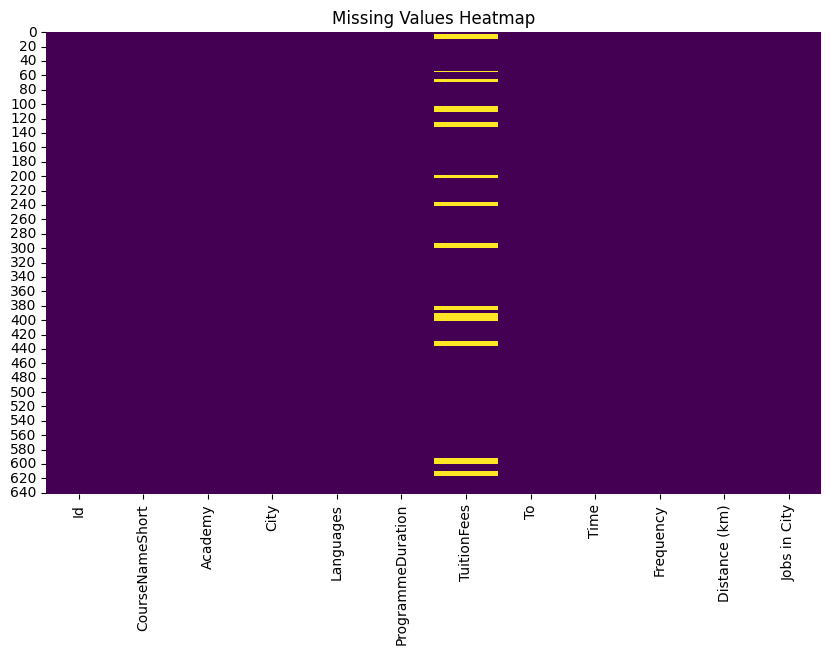

In [33]:
# Check for missing values in each column
print("\nMissing Values:")
missing_values = new_df.isnull().sum()
print(missing_values)

# Visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(new_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


## 3. Duplicates 

In [34]:
duplicates = new_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")



Number of duplicate rows: 0


## 4. Analyze Categorical Columns

In [35]:
# List of categorical columns
categorical_columns = new_df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_columns)

# Unique values for each categorical column
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(new_df[col].value_counts())



Categorical Columns:
Index(['CourseNameShort', 'Academy', 'City', 'Languages', 'TuitionFees', 'To'], dtype='object')

Column: CourseNameShort
CourseNameShort
Computer Science                                                     27
Data Science                                                         22
Master Of Science In Computer Science                                16
Computer Science (MSc)                                               14
Applied Computer Science (MSc)                                       14
Artificial Intelligence And Data Science                             13
High Integrity Systems (HIS)                                         12
MSc Artificial Intelligence And Machine Learning                     12
Master'S In Applied Data Science (MSc)                               12
Information Systems – MSc                                            11
Game Development And Research (MA)                                   11
Digital Sciences (MSc)                           

## 5. Analyze Numerical Columns 


Numerical Columns:
Index(['Id', 'ProgrammeDuration', 'Time', 'Frequency', 'Distance (km)',
       'Jobs in City'],
      dtype='object')


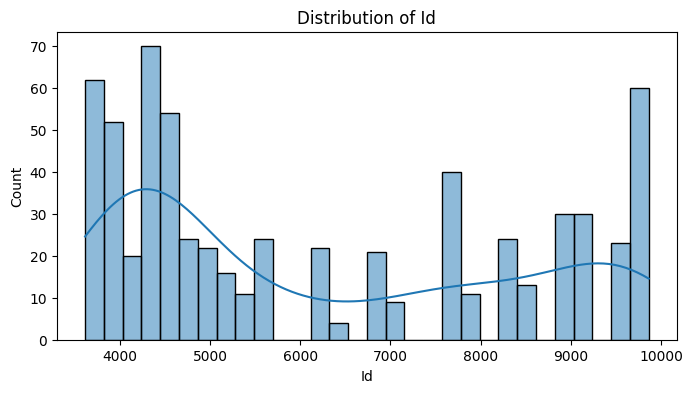

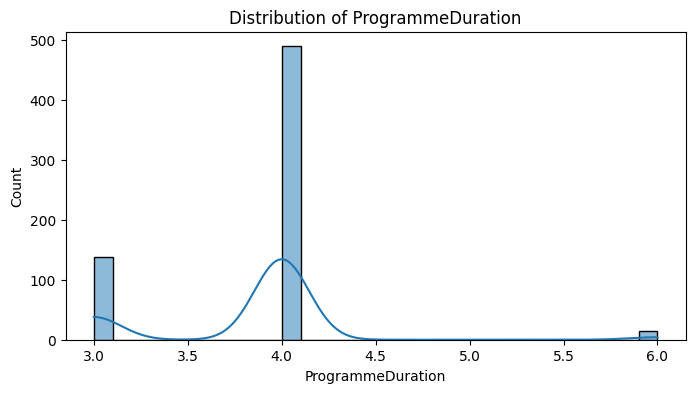

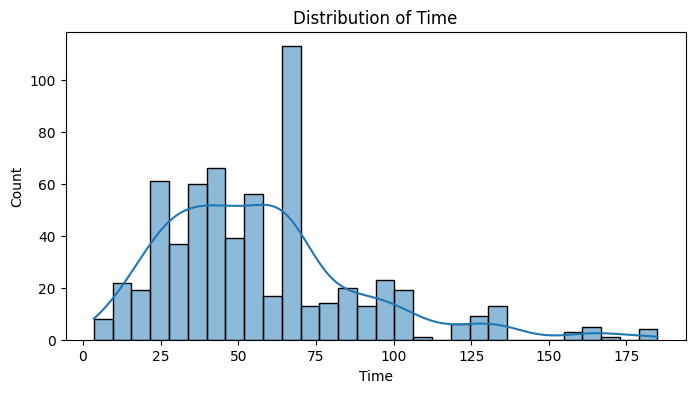

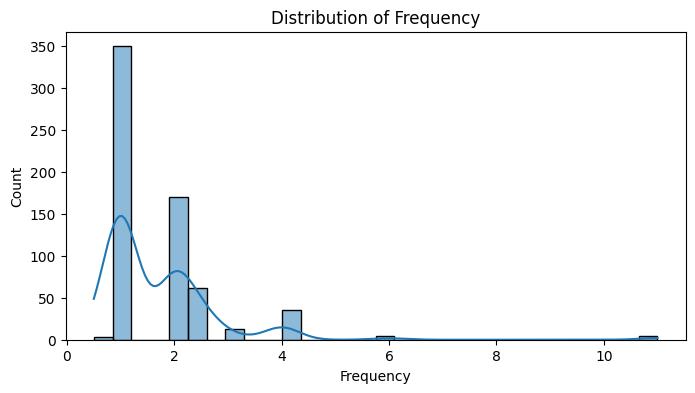

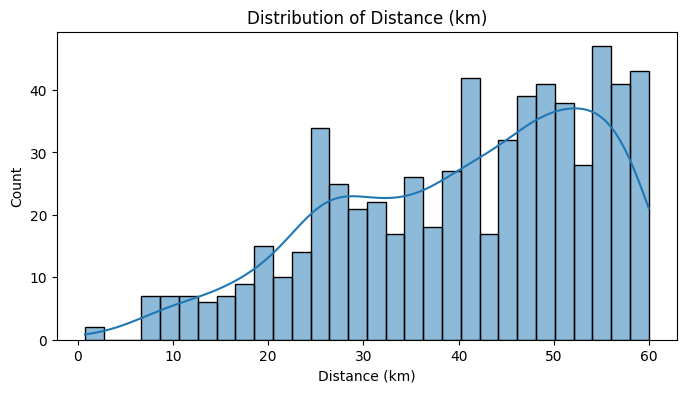

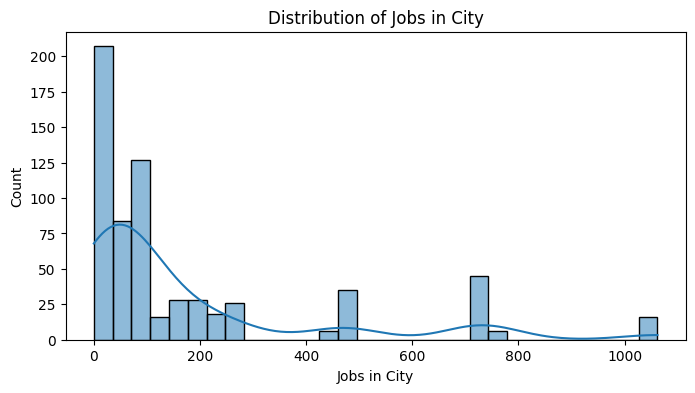

In [36]:
# List of numerical columns
numerical_columns = new_df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Columns:")
print(numerical_columns)

# Plot distributions for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(new_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


## 6. Correlation Analysis

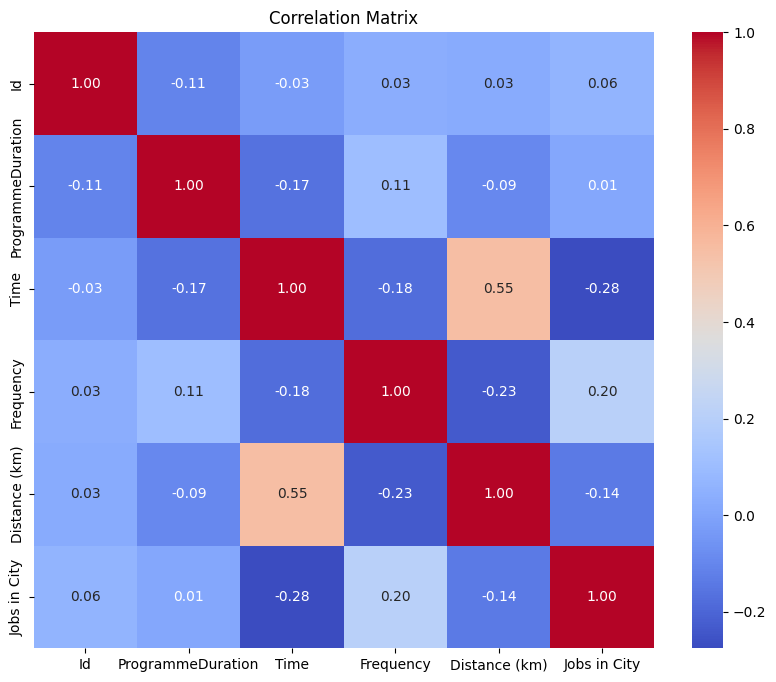

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation calculation
numerical_df = new_df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numerical_df.corr()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## 7. Visualize Relationship 

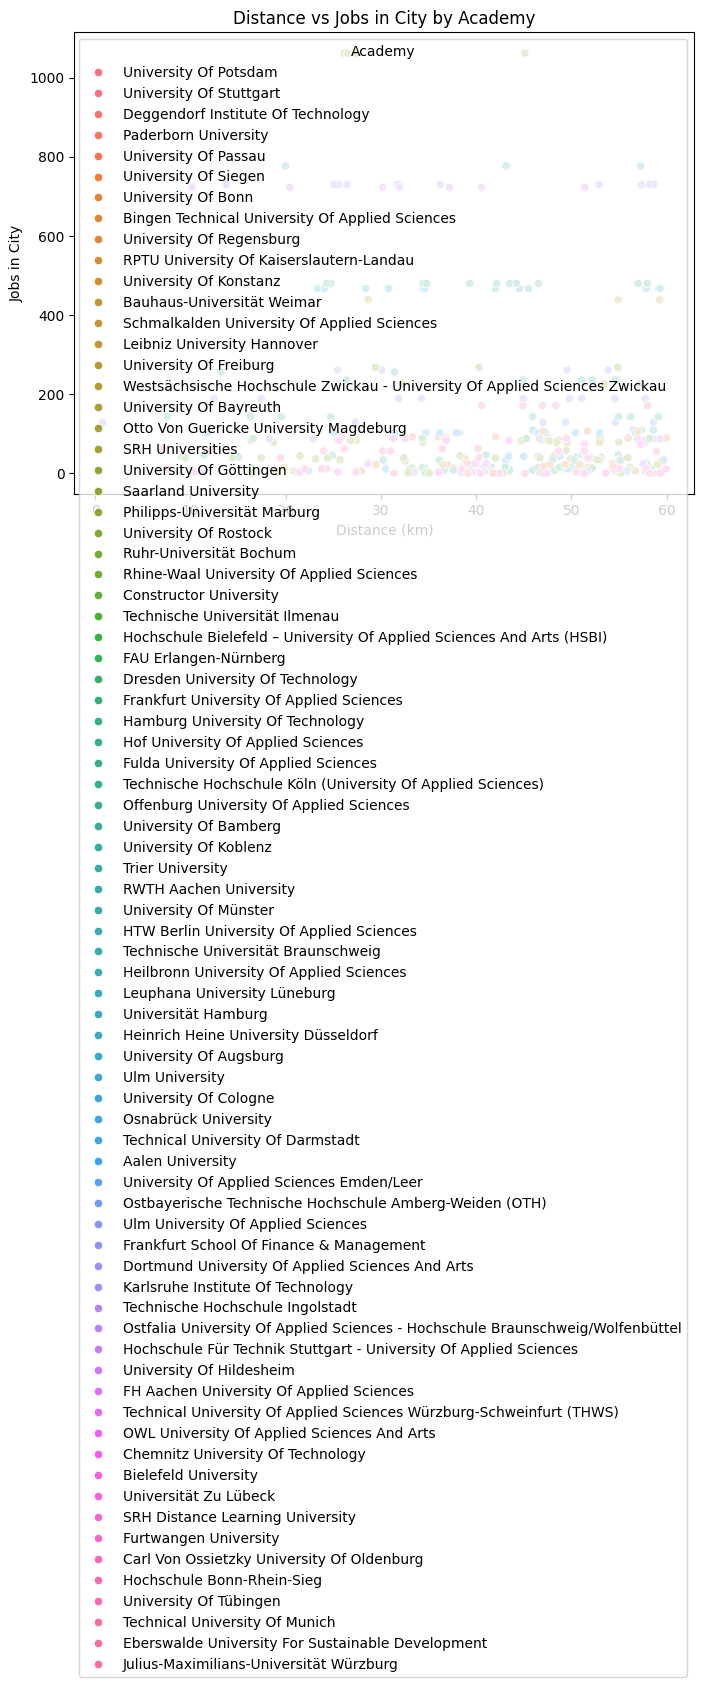

In [27]:
# Example: Scatter plot for two numerical columns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_df, x='Distance (km)', y='Jobs in City', hue='Academy')
plt.title("Distance vs Jobs in City by Academy")
plt.show()


## 9. Feature Engineering 